In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Moblie Price.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
x = df.drop('price_range',axis=1)
y = df['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print("AdaBoost Accuracy:", accuracy_ada)


AdaBoost Accuracy: 0.715


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 0.905


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)


XGBoost Accuracy: 0.905


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

print("LightGBM Accuracy:", accuracy_lgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.9075


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

cat_model = CatBoostClassifier()
cat_model.fit(x_train, y_train)
y_pred_cat = cat_model.predict(x_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)

print("CatBoost Accuracy:", accuracy_cat)


CatBoost Accuracy: 0.9425


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


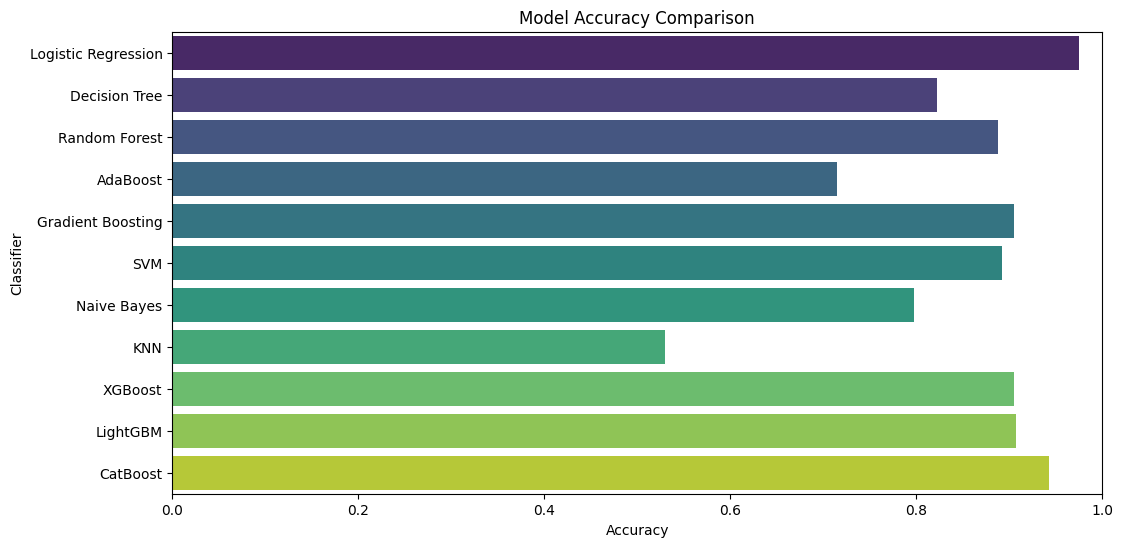

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

plt.figure(figsize=(12, 6))
sns.barplot(x=df_results["Accuracy"], y=df_results["Model"], palette="viridis")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()



In [ ]:
df_results

,Model,Accuracy
0,Logistic Regression,0.9750
1,Decision Tree,0.8225
2,Random Forest,0.8875
3,AdaBoost,0.7150
4,Gradient Boosting,0.9050
5,SVM,0.8925
6,Naive Bayes,0.7975
7,KNN,0.5300
8,XGBoost,0.9050
9,LightGBM,0.9075


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<Figure size 1200x600 with 0 Axes>

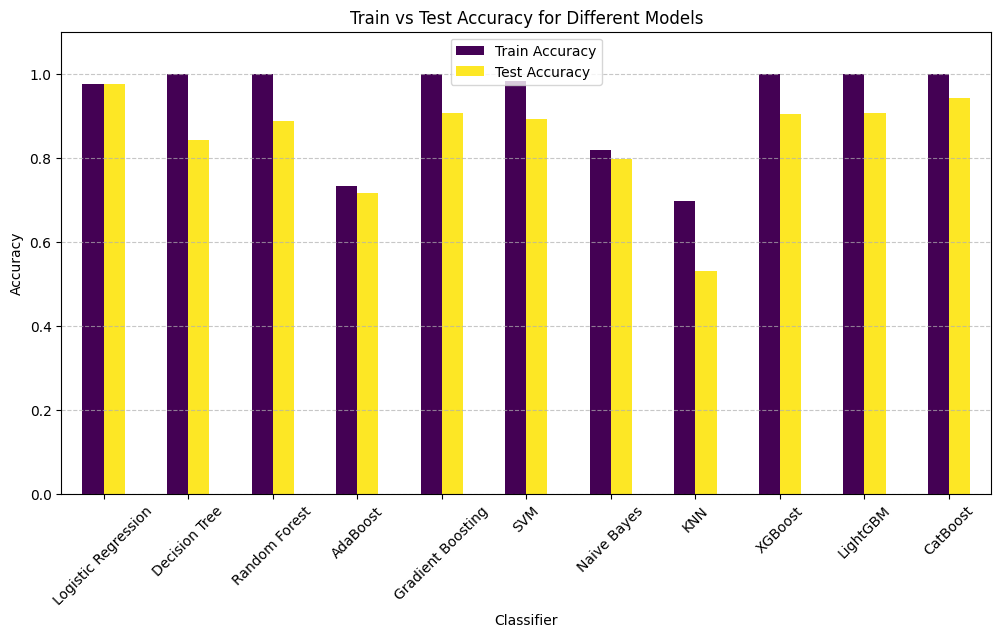

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(x_train))

    test_acc = accuracy_score(y_test, model.predict(x_test))

    results.append([name, train_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])

plt.figure(figsize=(12, 6))
df_results.set_index("Model").plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Different Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




In [ ]:
df_results

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.975625,0.9750
1,Decision Tree,1.000000,0.8300
2,Random Forest,1.000000,0.8925
3,AdaBoost,0.731875,0.7150
4,Gradient Boosting,0.999375,0.9050
5,SVM,0.983125,0.8925
6,Naive Bayes,0.819375,0.7975
7,KNN,0.696875,0.5300
8,XGBoost,1.000000,0.9050
9,LightGBM,1.000000,0.9075


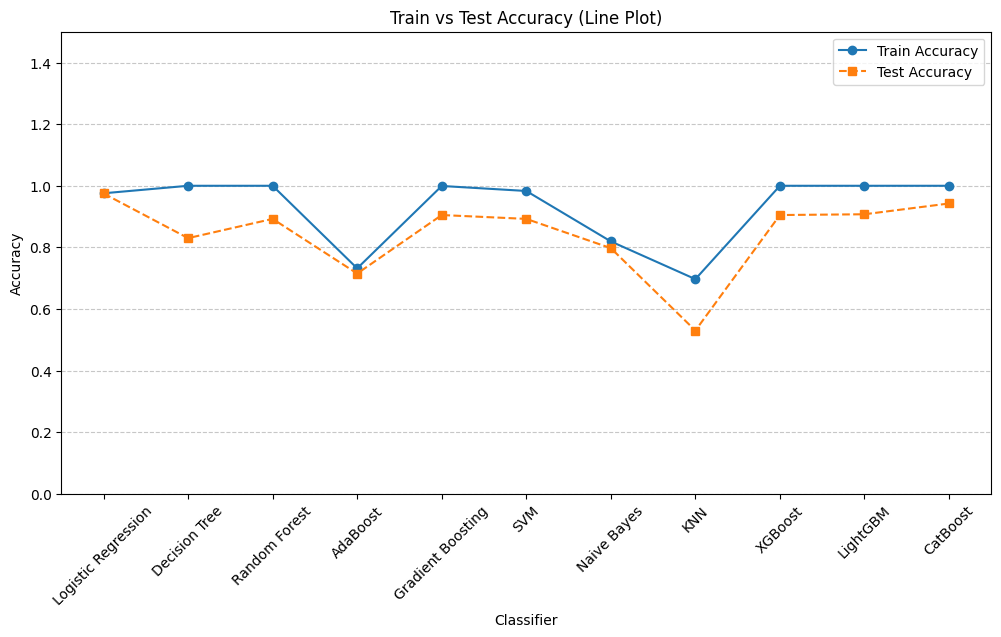

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_results["Model"], df_results["Train Accuracy"], marker='o', linestyle='-', label="Train Accuracy")
plt.plot(df_results["Model"], df_results["Test Accuracy"], marker='s', linestyle='--', label="Test Accuracy")

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy (Line Plot)")
plt.xticks(rotation=45)
plt.ylim(0, 1.5)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
